# Машинное обучение, ВМК МГУ

## Практическое задание 3. Метод опорных векторов и логистическая регрессия

### Общая информация

Дата выдачи: 8 ноября 2022

Мягкий дедлайн: 23:30MSK 22 ноября 2022 (за каждый день просрочки снимается 1 балл)

Жесткий дедлайн: 23:30MSK 29 ноября 2021.

### О задании

В этом задании вы:
- настроите метод опорных векторов, визуализируете опорные вектора
- познакомитесь с калибровочными кривыми и сравните вероятности, выдаваемые логистической регрессией и методом опорных векторов
- изучите методы работы с категориальными переменными
- в качестве бонуса попробуете библиотеку vowpal wabbit.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — **10 баллов + 4.8 бонусов**.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.

<p style="color:#de3815;font-size:25px;">
Напоминание об оформлении и выполнении ноутбука
</p>

* Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть, не запуская ячейки (кроме редких случаев, когда необходимо намеренно скрыть ненужный output, про такие случаи желательно писать пояснения в тексте). **В противном случае -1 балл**
* При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. **Не нужно** удалять и видоизменять написанный код и текст, если явно не указана такая возможность. Создавать новые ячейки с кодом/текстов там, где это осмысленно и вы считаете необходимым, конечно, можно. **В противном случае -1 балл**
* В anytask обязательно нужно прикреплять отдельно файл с расширением ipynb (не в архиве, а именно отдельно). Если необходимо отправить еще какие-то файлы, то вынесите их в отдельный архив (если файлов много) и пришлите. **В противном случае -0.5 балла**
---
* Пишите, пожалуйста, выводы и ответы на вопросы в текстовых ячейках/при помощи print в коде/как результат вывода ячейки. При их отсутствии мы не можем понять, сделали ли вы задание и понимаете, что происходит, и **поэтому будем снижать баллы**
* Если алгоритм не сказано реализовывать явно, его всегда можно импортировать из библиотеки.
---
* Про графики. _Штрафы будут применяться к каждому результату команды отображения графика (plt.show() и др. аналогичные). Исключением являются графики, генерируемые функциями каких-либо сторонних библиотек, если их нельзя кастомизировать_

    * должно быть название (plt.title) графика; **В противном случае &ndash; -0.05 балла**
    * на графиках должны быть подписаны оси (plt.xlabel, plt.ylabel); **В противном случае &ndash; -0.025 балла за каждую ось**
    * должны быть подписаны единицы измерения (если это возможно); **В противном случае &ndash; -0.025 балла за каждую ось**
    * все названия должны быть понятны любому человеку, знакомому с терминологией, без заглядывания в код; **В противном случае &ndash; -0.05 балла**
    * подписи тиков на осях не должны сливаться как на одной оси, так и между ними; **В противном случае &ndash; -0.025 балла за каждую ось**
    * если изображено несколько сущностей на одном холсте (например несколько функций), то необходима поясняющая легенда (plt.legend); **В противном случае &ndash; -0.05 балла**
    * все линии на графиках должны быть чётко видны (нет похожих цветов или цветов, сливающихся с фоном); **В противном случае &ndash; -0.05 балла**
    * если отображена величина, имеющая очевидный диапазон значений (например, проценты могут быть от 0 до 100), то желательно масштабировать ось на весь диапазон значений (исключением является случай, когда вам необходимо показать малое отличие, которое незаметно в таких масштабах);
    * графики должны быть не супер-микро и не супер-макро по размерам, так, чтобы можно было увидеть все, что нужно.
    * при необходимости улучшения наглядности графиков, можно пользоваться логарифмической шкалой по осям x/y.
    
### А также..

* Для удобства поиска вопросов, на которые от вас просят ответа, мы пометили их знаком **(?)**
* Знак **(!)** означает, что выполнение замечания необходимо для **возможности получения полного балла**
* Даем до +0.3 баллов за выдающиеся успехи по субъективному мнению проверяющих. Этот **бонус** не апеллируется

In [2]:
%pylab inline
import pandas as pd

from sklearn.linear_model import Ridge, Lasso
from sklearn.pipeline import Pipeline
import numpy as np

from sklearn.datasets import load_diabetes, make_classification
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_predict

from matplotlib.colors import ListedColormap

from sklearn.svm import LinearSVC, SVC

from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay, precision_recall_curve, roc_curve
from sklearn.metrics import roc_auc_score, average_precision_score

from sklearn.linear_model import LogisticRegression

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## Часть 1. Линейная регрессия

В этой части мы кратко познакомимся с линейной регрессией.

Для начала загрузим данные и разделим их на обучающую и тестовую выборки в соотношении 7 к 3.

In [8]:
data = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, train_size=0.7, random_state=241)

__Задание 1.__ Обучение линейной регрессии.

**(1 балл)**

Обучите линейную регрессию с $L_1$ (Lasso) и $L_2$ (Ridge) регуляризаторами (используйте параметры по умолчанию). Выведите  количество коэффициентов (веса, они же составляют вектор w) близких к 0 (степень близости к 0 определите сами из разумных пределов). Постройте график зависимости числа **ненулевых коэффициентов от коэффицента регуляризации** (перебирайте значения по _логарифмической сетке_ от $10^{-3}$ до $10^3$). Согласуются ли результаты с вашими ожиданиями? 

**Замечания:**
* Используйте модели из sklearn
* Можно строить графики с учетом $w_0$ (bias), можно без **(обязательно поясните, как в итоге строили),**  однако стоит учитывать, что $w_0 \approx 0$ несет другой смысл, нежели чем $w_i \approx 0$.
* Перебор по логарифмической сетке от $10^{-3}$ до $10^{3}$ подразумевает **равномерный перебор по степеням:** $10^{-3}, 10^{-2}, 10^{-1}, 10^{0}$ итд. Однако ничего не мешает (и не будет лишним) сделать и более частую равномерную сетку, если позволяет время вычислений. Менее частую сетку лучше делать в тех случаях, когда вычисления совсем запредельные по времени, однако помните, что делание выводов о какой-либо зависимости по 3-4 точкам может привести к ошибочным результатам **(и такое будет засчитываться как ошибка, если не пояснено, почему нельзя было сделать больше точек)**

In [22]:
pipe_lasso = Pipeline([('lasso', Lasso())])
pipe_ridge = Pipeline([('ridge', Ridge())])

pipe_ridge.fit(X_train, y_train)
pipe_lasso.fit(X_train, y_train)

threshold = 0.01

print('threshold is:', threshold)
print('ridge weights are close to 0:', (np.abs(pipe_ridge['ridge'].coef_) < threshold).sum())
print('lasso weights are close to 0:', (np.abs(pipe_lasso['lasso'].coef_) < threshold).sum())

threshold is: 0.01
ridge weights are close to 0: 0
lasso weights are close to 0: 7


In [23]:
print('ridge weights:', pipe_ridge['ridge'].coef_)
print('lasso weights:', pipe_lasso['lasso'].coef_)

ridge weights: [  20.86588099  -58.00039065  231.2704688   186.67010355   33.31087207
   -2.16994737 -150.95049376  141.35036492  250.75391278  123.18025806]
lasso weights: [  0.           0.         274.33128438  48.57203696   0.
   0.          -0.           0.         424.12142666   0.        ]


In [48]:
param_grid = {'alpha': np.logspace(start=-3, stop=3, base=10, num=20)}

zero_weights_lasso = list()
zero_weights_ridge = list()

for param in param_grid['alpha']:
    pipe_lasso = Pipeline([('lasso', Lasso(alpha=param))])
    pipe_ridge = Pipeline([('ridge', Ridge(alpha=param))])

    pipe_ridge.fit(X_train, y_train)
    pipe_lasso.fit(X_train, y_train)

    zero_weights_ridge.append((np.abs(pipe_ridge['ridge'].coef_) > threshold).sum())
    zero_weights_lasso.append((np.abs(pipe_lasso['lasso'].coef_) > threshold).sum())

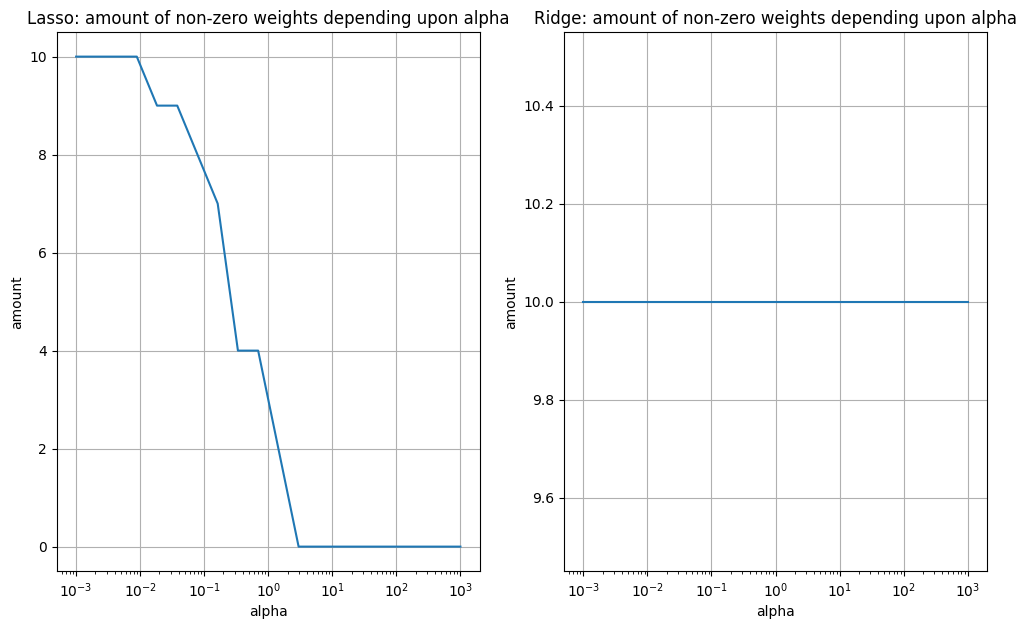

In [49]:
fig, axes = plt.subplots(1, 2, figsize=(12, 7))

axes[1].plot(param_grid['alpha'], zero_weights_ridge)
axes[0].plot(param_grid['alpha'], zero_weights_lasso)

axes[1].set_title('Ridge: amount of non-zero weights depending upon alpha')
axes[0].set_title('Lasso: amount of non-zero weights depending upon alpha')

for i in range(2):
    axes[i].grid(True)
    axes[i].set_xlabel('alpha')
    axes[i].set_ylabel('amount')
    axes[i].set_xscale('log')
    axes[i].set_yscale('linear')

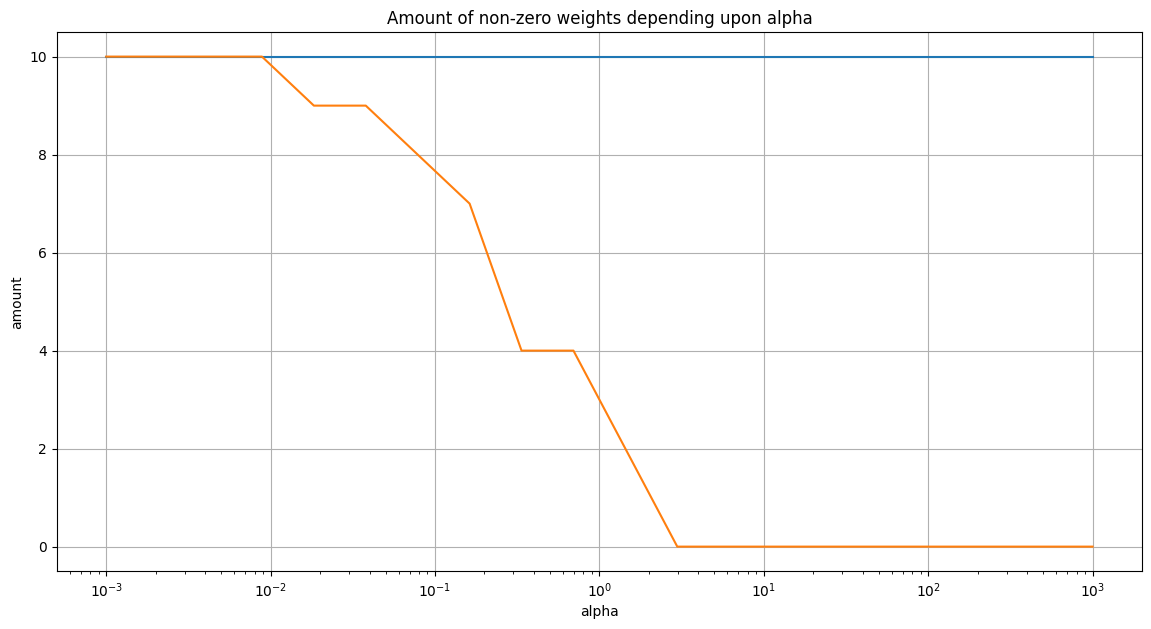

In [50]:
fig, ax = plt.subplots(1, 1, figsize=(14, 7))

ax.plot(param_grid['alpha'], zero_weights_ridge)
ax.plot(param_grid['alpha'], zero_weights_lasso)

ax.grid(True)
ax.set_title('Amount of non-zero weights depending upon alpha')
ax.set_xlabel('alpha')
ax.set_ylabel('amount')
ax.set_xscale('log')
ax.set_yscale('linear')

Все графики построены без учёта $w_0$ (bias). Можно заметить, что Ridge не обнуляет вес (но все равно стремит их к 0), когда Lasso делает нулевыми часть весов или все полностью, на графике выше видно, что происходит это, когда коэффициент регуляризации больше ~5

Посчитайте для Ridge-регрессии следующие метрики: $RMSE$, $MAE$, $R^2$.

In [53]:
ridge = Ridge()

ridge.fit(X_train, y_train)

print('RMSE:', mean_squared_error(ridge.predict(X_test), y_test, squared=False))
print('MAE:', mean_absolute_error(ridge.predict(X_test), y_test))
print('R2:', r2_score(ridge.predict(X_test), y_test))

RMSE: 58.30429511391227
MAE: 49.602750809651916
R2: -1.4946743718075175


Подберите на обучающей выборке для Ridge-регрессии коэффициент регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$) для каждой из метрик. Для этого воспользуйтесь GridSearchCV и KFold из sklearn. Постройте графики зависимости трех перечисленных выше метрик от коэффициента регуляризации. Заметно ли изменилось качество?

**Замечание:** функцию потерь на выборке (X, y) можно, например, посчитать вручную, вытащив коэффициенты из модели (обычно это атрибут coef_) и учитывая коэффициент регуляризации $\alpha$.

In [13]:
param_grid = {'alpha': np.logspace(start=-3, stop=3, base=10, num=20)}

best alpha: 0.0379269019073225


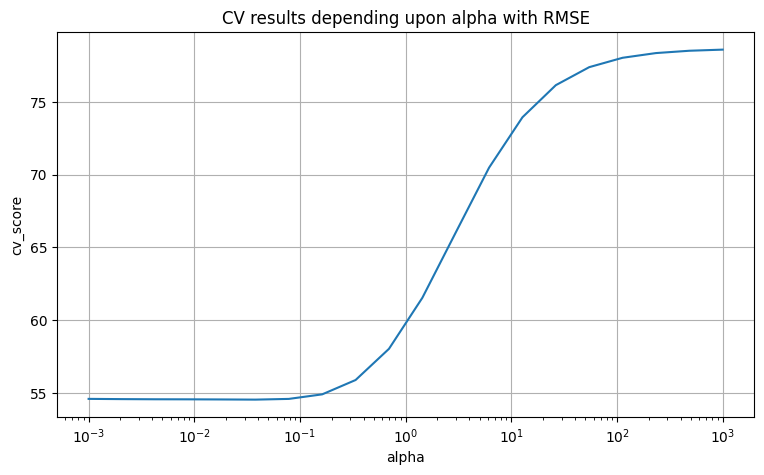

In [30]:
cv = KFold(n_splits=6, shuffle=True, random_state=42)
search_params = GridSearchCV(
    estimator=Ridge(),
    param_grid=param_grid,
    scoring='neg_root_mean_squared_error',
    cv=cv,
    refit=False,
    return_train_score=True
)

search_params.fit(X_train, y_train)

print('best alpha:', search_params.best_params_['alpha'])

fig, ax = plt.subplots(1, 1, figsize=(9, 5))

ax.plot(param_grid['alpha'], -search_params.cv_results_['mean_test_score'])
ax.set_xlabel('alpha')
ax.set_ylabel('cv_score')
ax.set_title('CV results depending upon alpha with RMSE')
ax.set_xscale('log')
ax.set_yscale('linear')
ax.grid(True)

best alpha: 0.00206913808111479


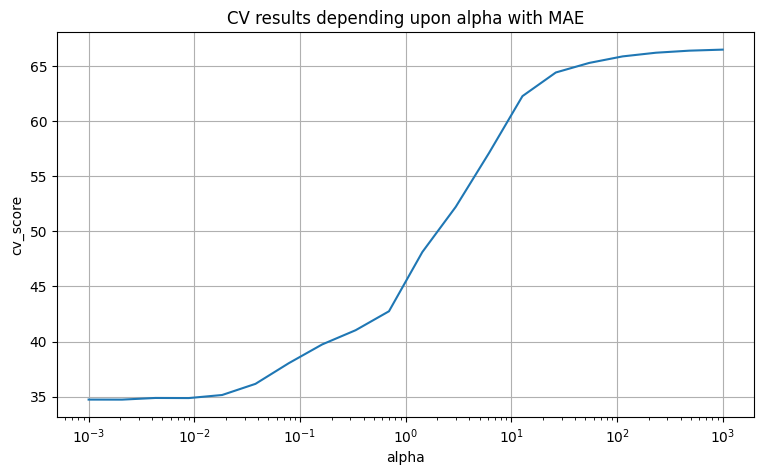

In [29]:
cv = KFold(n_splits=6, shuffle=True, random_state=42)
search_params = GridSearchCV(
    estimator=Ridge(),
    param_grid=param_grid,
    scoring='neg_median_absolute_error',
    cv=cv,
    refit=False,
    return_train_score=True
)

search_params.fit(X_train, y_train)

print('best alpha:', search_params.best_params_['alpha'])

fig, ax = plt.subplots(1, 1, figsize=(9, 5))

ax.plot(param_grid['alpha'], -search_params.cv_results_['mean_test_score'])
ax.set_xlabel('alpha')
ax.set_ylabel('cv_score')
ax.set_title('CV results depending upon alpha with MAE')
ax.set_xscale('log')
ax.set_yscale('linear')
ax.grid(True)

best alpha: 0.0379269019073225


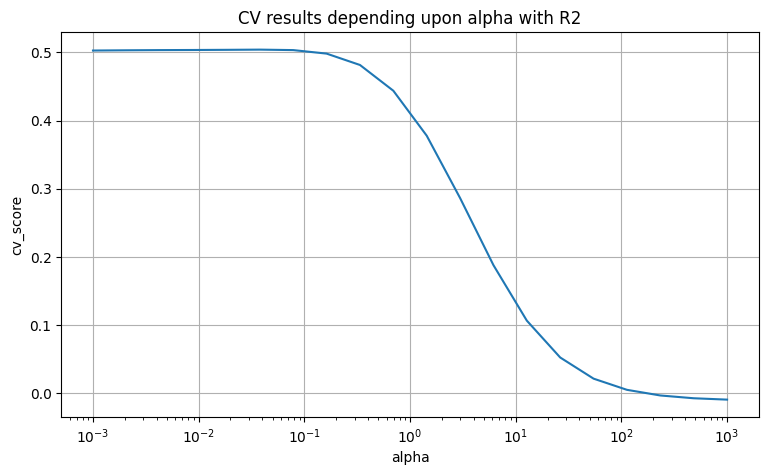

In [56]:
cv = KFold(n_splits=6, shuffle=True, random_state=42)
search_params = GridSearchCV(
    estimator=Ridge(),
    param_grid=param_grid,
    scoring='r2',
    cv=cv,
    refit=False,
    return_train_score=True
)

search_params.fit(X_train, y_train)

print('best alpha:', search_params.best_params_['alpha'])

fig, ax = plt.subplots(1, 1, figsize=(9, 5))

ax.plot(param_grid['alpha'], search_params.cv_results_['mean_test_score'])
ax.set_xlabel('alpha')
ax.set_ylabel('cv_score')
ax.set_title('CV results depending upon alpha with R2')
ax.set_xscale('log')
ax.set_yscale('linear')
ax.grid(True)

Сделаем тоже самое, но не будем в финальном качестве учитывать регуляризацию на веса

In [41]:
cv = KFold(n_splits=6, shuffle=True, random_state=42)
cv.get_n_splits(X_train)

best_rmse, best_alpha = None, None
rmse_scores = list()

for alpha in param_grid['alpha']:
    all_losses = list()
    for i, (train_index, test_index) in enumerate(cv.split(X_train)):

        train_data_x, train_data_y = X_train[train_index], y_train[train_index]
        test_data_x, test_data_y = X_train[test_index], y_train[test_index]

        model = Ridge(alpha=alpha)

        model.fit(train_data_x, train_data_y)

        y_pred = model.predict(test_data_x)

        loss = mean_squared_error(y_pred, test_data_y, squared=False)

        all_losses.append(loss)
    
    cv_result = np.mean(all_losses)
    rmse_scores.append(cv_result)
    if best_rmse is None:
        best_rmse = cv_result
        best_alpha = alpha
    elif cv_result < best_rmse:
        best_rmse = cv_result
        best_alpha = alpha

best alpha: 0.0379269019073225


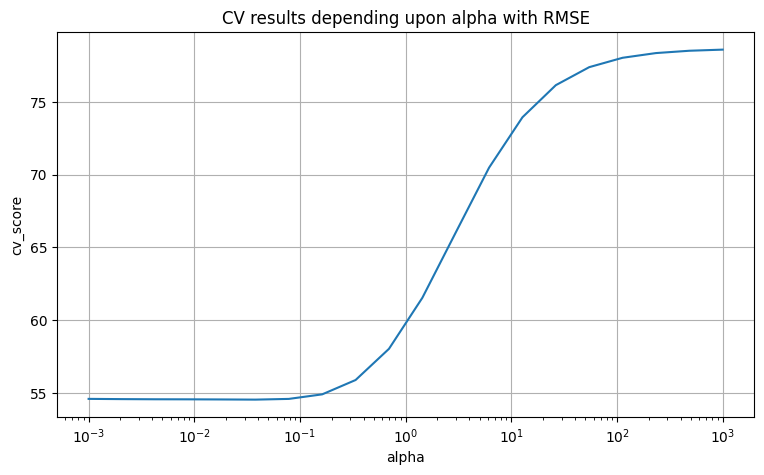

In [42]:
print('best alpha:', best_alpha)

fig, ax = plt.subplots(1, 1, figsize=(9, 5))

ax.plot(param_grid['alpha'], rmse_scores)
ax.set_xlabel('alpha')
ax.set_ylabel('cv_score')
ax.set_title('CV results depending upon alpha with RMSE')
ax.set_xscale('log')
ax.set_yscale('linear')
ax.grid(True)

А теперь будет учитывать регуляризацию на веса в итоговом скоре

In [43]:
cv = KFold(n_splits=6, shuffle=True, random_state=42)
cv.get_n_splits(X_train)

best_rmse, best_alpha = None, None
rmse_scores = list()

for alpha in param_grid['alpha']:
    all_losses = list()
    for i, (train_index, test_index) in enumerate(cv.split(X_train)):

        train_data_x, train_data_y = X_train[train_index], y_train[train_index]
        test_data_x, test_data_y = X_train[test_index], y_train[test_index]

        model = Ridge(alpha=alpha)

        model.fit(train_data_x, train_data_y)

        y_pred = model.predict(test_data_x)

        loss = mean_squared_error(y_pred, test_data_y, squared=False)
        loss += np.mean(alpha * (model.coef_ ** 2))

        all_losses.append(loss)
    
    cv_result = np.mean(all_losses)
    rmse_scores.append(cv_result)
    if best_rmse is None:
        best_rmse = cv_result
        best_alpha = alpha
    elif cv_result < best_rmse:
        best_rmse = cv_result
        best_alpha = alpha

best alpha: 1000.0


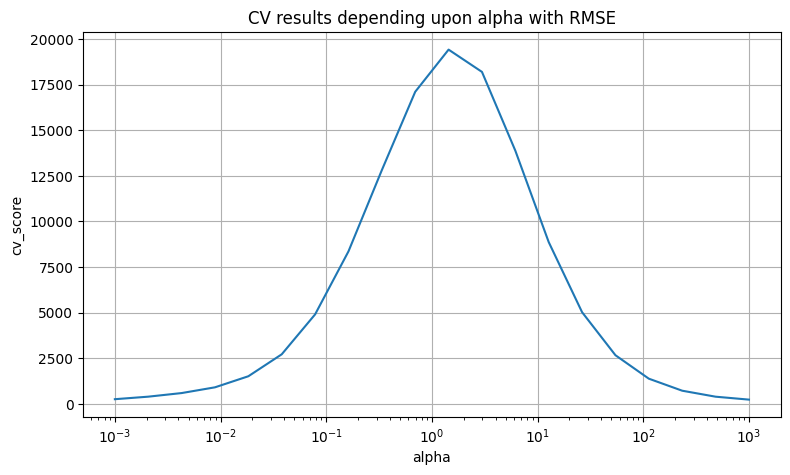

In [44]:
print('best alpha:', best_alpha)

fig, ax = plt.subplots(1, 1, figsize=(9, 5))

ax.plot(param_grid['alpha'], rmse_scores)
ax.set_xlabel('alpha')
ax.set_ylabel('cv_score')
ax.set_title('CV results depending upon alpha with RMSE')
ax.set_xscale('log')
ax.set_yscale('linear')
ax.grid(True)

__Задание 2.__ Поиск объектов-выбросов

**(0.5 балла)**

Как известно, MSE сильно штрафует за большие ошибки на объектах-выбросах. С помощью cross_val_predict сделайте Out-of-Fold предсказания для обучающей выборки. Посчитайте ошибки и посмотрите на их распределение (plt.hist). Что вы видите?

In [57]:
loo_predict = cross_val_predict(
    estimator=Ridge(),
    X=X_train,
    y=y_train,
    cv=LeaveOneOut(),
    n_jobs=-1,
    method='predict'
)

errs = (loo_predict - y_train) ** 2

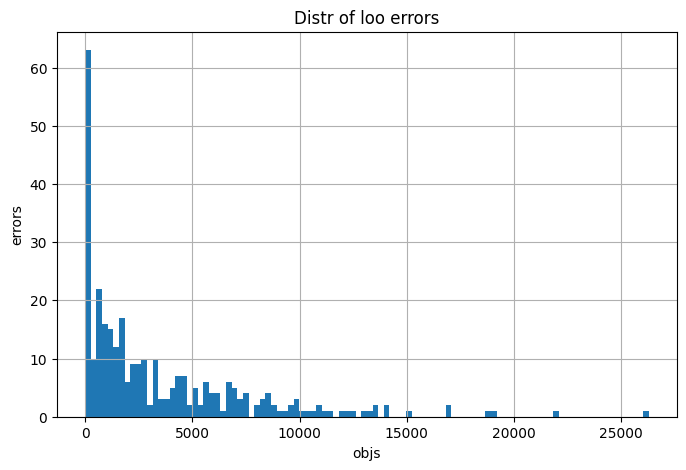

In [60]:
import math

fig, ax = plt.subplots(1, 1, figsize=(8, 5))

ax.hist(
    errs, 
    bins=max(1 + math.ceil(math.log(3.322 * loo_predict.shape[0])), 100)
)
ax.grid(True)
ax.set_title('Distr of loo errors')
ax.set_xlabel('objs')
ax.set_ylabel('errors')

None

Попробуйте удалить объекты-выбросы из обучающей выборки (что считать или не считать выбросами на ваше усмотрение). Обучите модель заново и посмотрите на качество на отложенной (или, называемой валидационной) (X_test, y_test) выборке (учитывайте, что там тоже могут быть выбросы, с которыми вы ничего не можете сделать). Стало ли лучше? Чем вы можете объяснить это?

In [70]:
for threshold in [0.9, 0.95, 0.97, 0.99]:
    mask = errs < np.quantile(errs, threshold)

    model_cleaned = Ridge()
    model = Ridge()

    model.fit(X_train, y_train)
    model_cleaned.fit(X_train[mask], y_train[mask])

    y_pred_cleaned = model_cleaned.predict(X_test)
    y_pred = model.predict(X_test)

    mse_score_cleaned = mean_squared_error(y_pred_cleaned, y_test)
    mse_score = mean_squared_error(y_pred, y_test)

    print('after cleaning:', mse_score_cleaned, 'with threshold:', np.quantile(errs, threshold))
    print('before cleaning:', mse_score)
    print()

after cleaning: 3628.329474884778 with threshold: 8806.538359816064
before cleaning: 3399.3908287301742

after cleaning: 3567.072305549695 with threshold: 11713.237253005656
before cleaning: 3399.3908287301742

after cleaning: 3513.5427779060706 with threshold: 13646.79541200551
before cleaning: 3399.3908287301742

after cleaning: 3468.9599798024533 with threshold: 18725.194558149666
before cleaning: 3399.3908287301742



**Ответ: В основном после удаления объектов стало чуть хуже. Обьяснить это можно тем, что скорее всего в тестовой выборке так же есть объекты выбросы. Кроме того, так как наша выборка немногочисленна, то удаление даже небольшого числа объектов может повлиять на итоговое качество. Но тем не менее видно, что в целом отклонение не сильно большое, так как ошибки не сконцентрированны в одном месте, а разбросаны по всему графику (видно выше)**

## Часть 2. Метод опорных векторов и калибровка вероятностней

Сгенерируем синтетические данные.

In [147]:
X, y = make_classification(
    n_samples=100000, n_features=20, n_informative=10, n_redundant=10,
    random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

__Задание 1.__ Обучение и применение метода опорных векторов.

__(1 балл)__

Обучите метод опорных векторов. На занятиях мы проходили обычный вариант, что соответствует линейному ядру (LinearSVC/LinearSVR в scikit-learn).

In [149]:
svc = LinearSVC(dual='auto')
svc.fit(X_train, y_train)

y_pred_score = svc.decision_function(X_test)
y_pred = svc.predict(X_test)

На тестовой части посчитайте ROC-AUC, PR-AUC. Постройте ROC и PR кривые.

In [150]:
print('ROC AUC score:', np.round(roc_auc_score(y_test, y_pred_score), 4))
print('PR score:', np.round(average_precision_score(y_test, y_pred_score), 4))

ROC AUC score: 0.9259
PR score: 0.9248


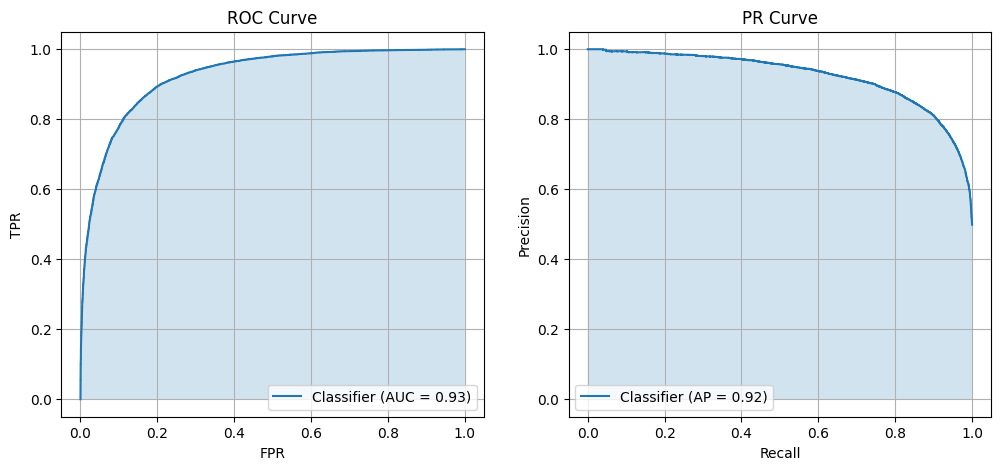

In [154]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

fpr, tpr, _ = roc_curve(y_test, y_pred_score)
RocCurveDisplay.from_predictions(y_true=y_test, y_pred=y_pred_score, ax=ax[0])

precision, recall, _ = precision_recall_curve(y_test, y_pred_score)
PrecisionRecallDisplay.from_predictions(y_true=y_test, y_pred=y_pred_score, ax=ax[1])

ax[0].grid(True)
ax[0].set_title("ROC Curve")
ax[0].set_ylabel('TPR')
ax[0].set_xlabel('FPR')
ax[0].fill_between(fpr, tpr, alpha=0.2)

ax[1].grid(True)
ax[1].set_title("PR Curve")
ax[1].set_ylabel('Precision')
ax[1].set_xlabel('Recall')
ax[1].fill_between(recall, precision, alpha=0.2)

None

В названии метода присутствуют некоторые "опорные векторы". Сгенерируйте синтетический датасет с помощью make_classification с 2 признаками (хотя бы 100 объектов, но желательно больше), обучите на нём метод опорных векторов. Визуализируйте разделяющую прямую, все объекты и выделите опорные вектора (атрибут support\_vectors\_). В этот раз вместо LinearSVC воспользуйтесь SVC с линейным ядром (kernel='linear'), так как только в нём есть информация об опорных векторах.

**Замечания:**
* Графики должны быть оформлены правильно, в соответствии с теми требованиями, которые были в первой лабороторной. Так же опорные вектора следует рисовать не другим цветом, а другой **меткой** (например, крестик), иначе теряется принадлежность к классу. Точки из разных классов рисуйте **разными цветами** (или разными фигурами). Если необходимо, можно вводить альфа-канал (степень прозрачности) для улучшения восприятия. Можно (и очень рекомендуется) рисовать не только разделяющую прямую, но из "разделяющую полосу" вокруг прямой.
* **Обязательно пишите легенду,** поясняющую что изображено на полотне.

In [6]:
n_samples = 200

X, y = make_classification(
    n_samples=n_samples, n_features=2, n_informative=2, n_redundant=0,
    random_state=100
)

In [178]:
name_kernel = 'linear'
svc = SVC(kernel=name_kernel)

svc.fit(X, y)

SVC(kernel='linear')

In [203]:
def plot_separating_surface(
        X, y, cls,
        view_support=False, view_band=False, 
        title='', threshold=0.2
    ):

    _, ax = plt.subplots(1, 1, figsize=(8, 7))
    if title:
        ax.set_title(title)

    # s - size of points
    # c - colors of points: int or string
    # edgecolors - color of points' boarder
    # cmap - colors of points in every zone
    labels = np.unique(y)

    if view_support:
        support_idx = cls.support_
        non_support_idx = np.array([i for i in range(len(X)) if i not in support_idx])
        
        colors = ['red', 'blue']
        for idx, label in enumerate(labels):

            support_labels2idx = support_idx[y[support_idx] == label]
            non_support_labels2idx = non_support_idx[y[non_support_idx] == label]

            ax.scatter(
                X[support_labels2idx, 0], X[support_labels2idx, 1], 
                c=colors[idx], s=100, 
                marker='x',
                label=f'support objs class: {idx}'
            )

            ax.scatter(
                X[non_support_labels2idx, 0], X[non_support_labels2idx, 1], 
                c=colors[idx], s=40,
                edgecolors='k',
                label=f'non-support objs class: {idx}'
            )

    else:
        ax.scatter(
            X[:, 0], X[:, 1], 
            c=y, s=40
        )

    # w0x0 + w1x1 + b = 0
    # x1 = -w0/w1 * x0 - b/w1

    w = svc.coef_[0]
    b = svc.intercept_
    coord_x = np.array([min(X[:, 0]), max(X[:, 0])])

    tg_corner = - w[0] / w[1]
    bias = - b/ w[1]

    ax.plot(coord_x, w * tg_corner + bias, c='green', label='sep hyperplane')

    if view_band:
        ax.plot(coord_x, w * tg_corner + bias - threshold, c='orange', label='sep band')
        ax.plot(coord_x, w * tg_corner + bias + threshold, c='orange')
        ax.fill_between(
            coord_x, 
            w * tg_corner + bias - threshold, w * tg_corner + bias + threshold, 
            alpha=0.15, color='orange'
        )

    ax.set_xticks(())
    ax.set_yticks(())
    ax.grid(True)
    ax.legend()

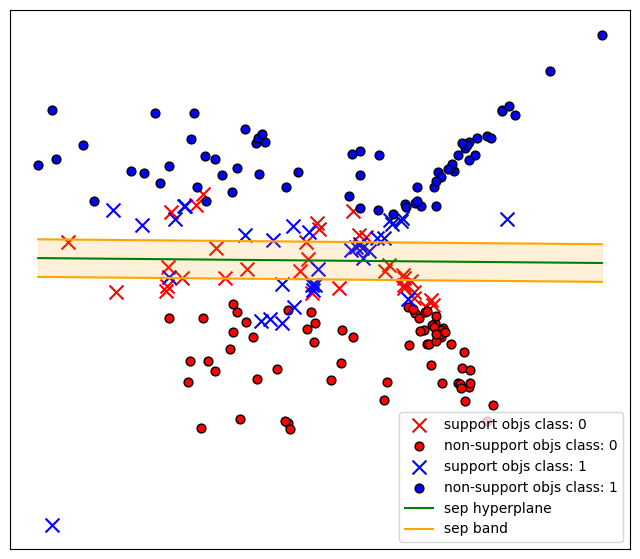

In [204]:
plot_separating_surface(X, y, svc, view_support=True, view_band=True, threshold=0.3)

__Задание 2.__ Калибровка вероятностей.

__(1.5 балла)__

Перейдём к оценке качества выдаваемых алгоритмами вероятностей. Начнём с калибровочных кривых. 

Допустим, алгоритм возвращает некоторые числа от нуля до единицы. Хорошо ли они оценивают вероятность? Для этого разобьем отрезок $[0, 1]$ на несколько маленьких отрезков одинаковой длины. Рассмотрим $i$-й отрезок с границами $[a_i, b_i]$ и предсказания $p_1, p_2, \dots, p_k$, которые попали в него. Пусть им соответствуют истинные ответы $y_1, y_2, \dots, y_k$. Если алгоритм выдает корректные вероятности, то среди этих истинных ответов должно быть примерно $(a_i + b_i) / 2$ единиц. Иными словами, если нарисовать кривую, у которой по оси X отложены центры отрезков, а по оси Y — доли единичных ответов этих в отрезках, то она должна оказаться диагональной. Ниже приведена функция, которая должна рисовать такие кривые. В ней допущено две ошибки — найдите и исправьте их.

In [9]:
def plot_calibration_curve(
        y_test, preds, 
        label, color, ax, 
        set_plot_pararms=False, n_bins=20, 
        plot_ground_truth=False
    ):

    if set_plot_pararms:
        ax.grid(True)
        ax.set_xlabel('probs')
        ax.set_ylabel('probs for class 1')
        ax.set_title('Callibration curves')

    if plot_ground_truth:

        bin_middle_points = np.linspace(0, 1.0, 100)
        bin_real_ratios = np.linspace(0, 1.0, 100)
        ax.plot(bin_middle_points, bin_real_ratios, label=label, color=color, linestyle='-.')
        ax.legend()

    else:

        bin_middle_points = []
        bin_real_ratios = []
        step = 1.0 / n_bins
        for i in range(n_bins):
            l = i * step
            r = min((i + 1) * step, 1.0)
            bin_middle_points.append((l + r) / 2) # '-' на '+'

            y_cur_segment = y_test[(preds >= l) & (preds < r)] == 1
            bin_real_ratios.append(np.mean(y_cur_segment)) # mean вместо min

        ax.plot(bin_middle_points, bin_real_ratios, label=label, color=color)
        ax.legend()

Постройте калибровочные кривые для логистической регрессии и метода опорных векторов. Изучите распределение ответов классификаторов (постройте гистограммы с помощью plt.hist). Чем они различаются? Чем вы можете объяснить это?

Заметим, что метод опорных векторов не умеет predict_proba, но имеет метод decision_function.

In [3]:
n_samples = 15000
n_features = 15
n_redundant = 4
n_informative = 11

X, y = make_classification(
    n_samples=n_samples, n_features=n_features, 
    n_informative=n_informative, n_redundant=n_redundant,
    random_state=100
)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

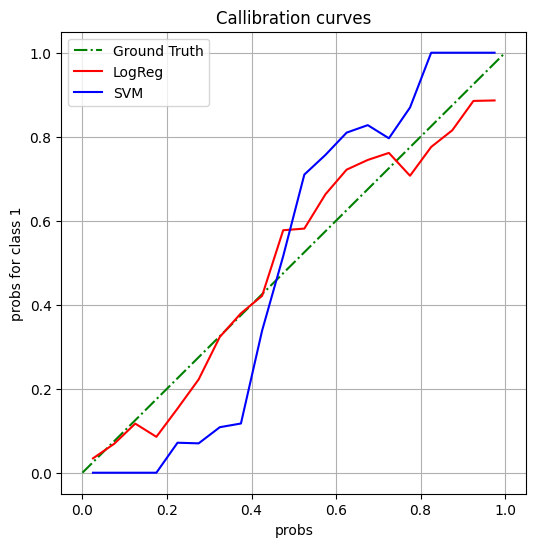

In [14]:
name_kernel = 'linear'

logreg = LogisticRegression()
svc = SVC(kernel=name_kernel)

logreg.fit(X_train, y_train)
svc.fit(X_train, y_train)

_, ax = plt.subplots(1, 1, figsize=(6, 6))

plot_calibration_curve(None, None, label='Ground Truth', color='g', ax=ax, set_plot_pararms=True, plot_ground_truth=True)

y_pred = logreg.predict_proba(X_test)
plot_calibration_curve(y_test, y_pred[:, 1], label='LogReg', color='r', ax=ax)

y_pred_svc = svc.decision_function(X_test)
y_pred_svc_proba = (y_pred_svc - y_pred_svc.min()) / (y_pred_svc.max() - y_pred_svc.min())
plot_calibration_curve(y_test, y_pred_svc_proba, label='SVM', color='b', ax=ax)

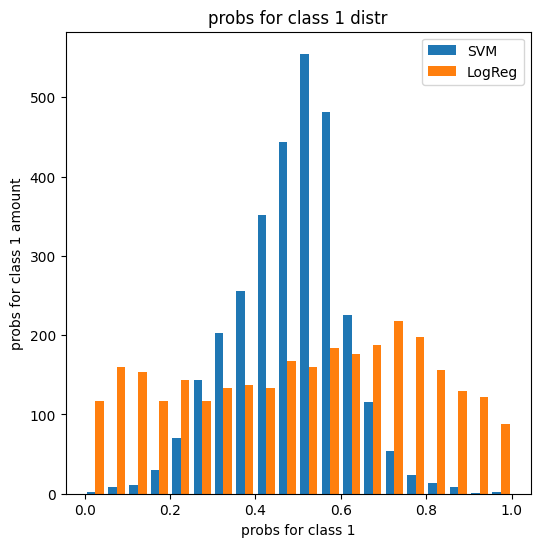

In [31]:
_, ax = plt.subplots(1, 1, figsize=(6, 6))

ax.hist([y_pred_svc_proba, y_pred[:, 1]], bins=20, label=['SVM', 'LogReg'])

ax.legend()
ax.set_xlabel('probs for class 1')
ax.set_ylabel('probs for class 1 amount')
ax.set_title('probs for class 1 distr')

None

**В первую очередь можно заметить, что вероятности SVM больше задают нормальное распределение, когда как вероятности LogReg - равномерное, что говорит о том, что SVM плохо откалиброван, так же об это говорит сильное отклоение неоткалиброванной кривой SVM на графике выше (через 1)**

Воспользуйтесь CalibratedClassifierCV из sklearn для калибровки вероятностей метода опорных векторов на обучении и постройте с его помощью предсказания для тестовой выборки. Нарисуйте для них калибровочную кривую. Улучшилась ли она?

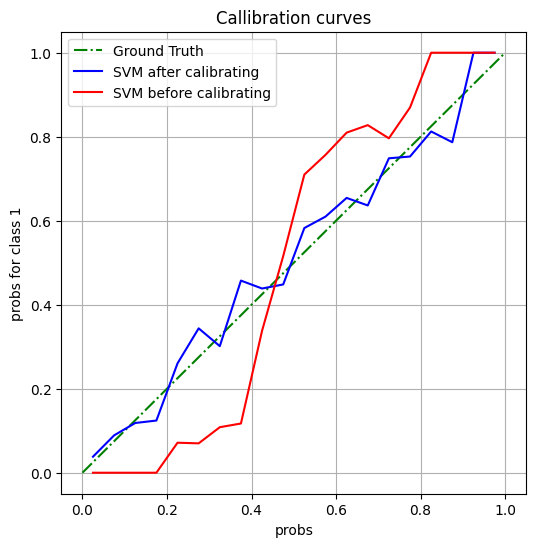

In [22]:
from sklearn.calibration import CalibratedClassifierCV

name_kernel = 'linear'

calibrate_svc = CalibratedClassifierCV(
    estimator=SVC(kernel=name_kernel),
    method='isotonic',
    cv=5,
    n_jobs=-1
)

calibrate_svc.fit(X_train, y_train)

_, ax = plt.subplots(1, 1, figsize=(6, 6))

plot_calibration_curve(None, None, label='Ground Truth', color='g', ax=ax, set_plot_pararms=True, plot_ground_truth=True)

y_proba = calibrate_svc.predict_proba(X_test)[:, 1]
plot_calibration_curve(y_test, y_proba, label='SVM after calibrating', color='b', ax=ax)

svc = SVC(kernel=name_kernel)
svc.fit(X_train, y_train)

y_pred_svc = svc.decision_function(X_test)
y_pred_svc_proba = (y_pred_svc - y_pred_svc.min()) / (y_pred_svc.max() - y_pred_svc.min())
plot_calibration_curve(y_test, y_pred_svc_proba, label='SVM before calibrating', color='r', ax=ax)

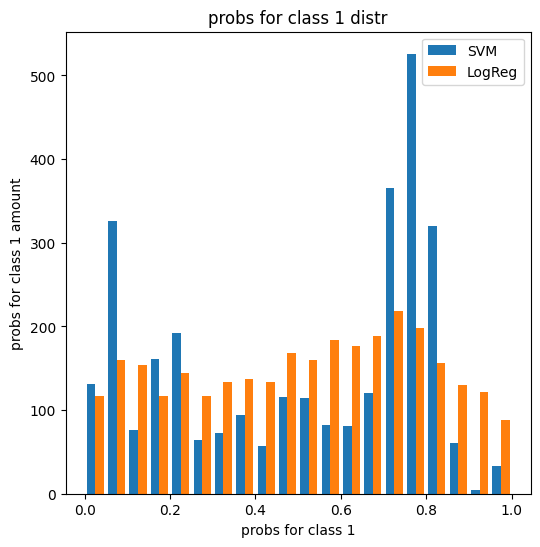

In [32]:
_, ax = plt.subplots(1, 1, figsize=(6, 6))

ax.hist([y_proba, y_pred[:, 1]], bins=20, label=['SVM', 'LogReg'])

ax.legend()
ax.set_xlabel('probs for class 1')
ax.set_ylabel('probs for class 1 amount')
ax.set_title('probs for class 1 distr')

None

**После калибровки распределение вероятностей SVM достаточно неплохо начало походить на идеальную калибровочную прямую**

__Бонусное задание (1 балл).__ Реализуйте свою функцию для калибровки вероятностей. Опишите ваш подход и продемонстрируйте результаты.

In [7]:
name_kernel = 'linear'
svc = SVC(kernel=name_kernel)
svc.fit(X_train, y_train)

y_pred_svc = svc.decision_function(X_test)
y_pred_svc_proba = (y_pred_svc - y_pred_svc.min()) / (y_pred_svc.max() - y_pred_svc.min())

In [11]:
def sigmoid_calibrate(y_proba, labels, n_iter=1000, lr=0.0005):
    from math import exp
    
    a, b = 1, 1
    
    def sigmoid_np(x, a, b):
        return 1 / (1 + exp((-1) * (a * x + b)))
    
    v_sigmoid = np.vectorize(sigmoid_np)

    def compute_grad_a(probs, labels, a, b):
        eyes = np.array([i for i in range(len(labels))])
        non_grad_part = ((eyes - labels) / (eyes - v_sigmoid(probs, a, b))) - (labels / v_sigmoid(probs, a, b))
        grad_part = probs * (v_sigmoid(probs, a, b) ** 2) * np.exp((-1) * (a * probs + b))
        return np.sum(grad_part * non_grad_part)
    
    def compute_grad_b(probs, labels, a, b):
        eyes = np.array([i for i in range(len(labels))])
        non_grad_part = ((eyes - labels) / (eyes - v_sigmoid(probs, a, b))) - (labels / v_sigmoid(probs, a, b))
        grad_part = (v_sigmoid(probs, a, b) ** 2) * np.exp((-1) * (a * probs + b))
        return np.sum(grad_part * non_grad_part)

    for _ in range(n_iter):
        grad_a = compute_grad_a(y_proba, labels, a, b)
        grad_b = compute_grad_b(y_proba, labels, a, b)

        a -= lr * grad_a
        b -= lr * grad_b

    return lambda x: 1 / (1 + exp((-1) * (a * x + b)))


calibrate_sigmoid = sigmoid_calibrate(y_pred_svc_proba, y_test, n_iter=2000)
v_calibrate_sigmoid = np.vectorize(calibrate_sigmoid)

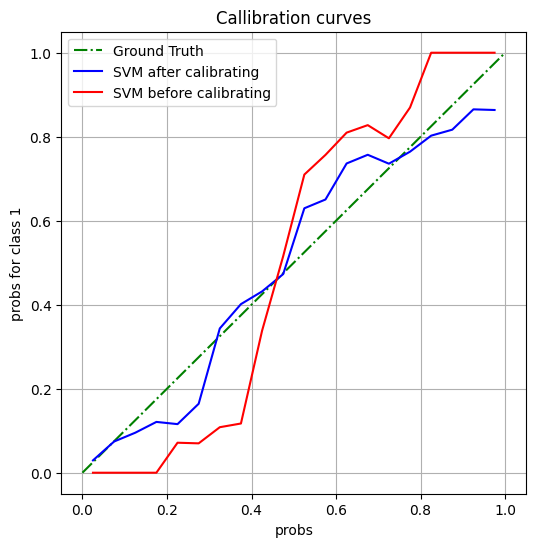

In [12]:
_, ax = plt.subplots(1, 1, figsize=(6, 6))

plot_calibration_curve(None, None, label='Ground Truth', color='g', ax=ax, set_plot_pararms=True, plot_ground_truth=True)

plot_calibration_curve(y_test, v_calibrate_sigmoid(y_pred_svc_proba), label='SVM after calibrating', color='b', ax=ax)

plot_calibration_curve(y_test, y_pred_svc_proba, label='SVM before calibrating', color='r', ax=ax)

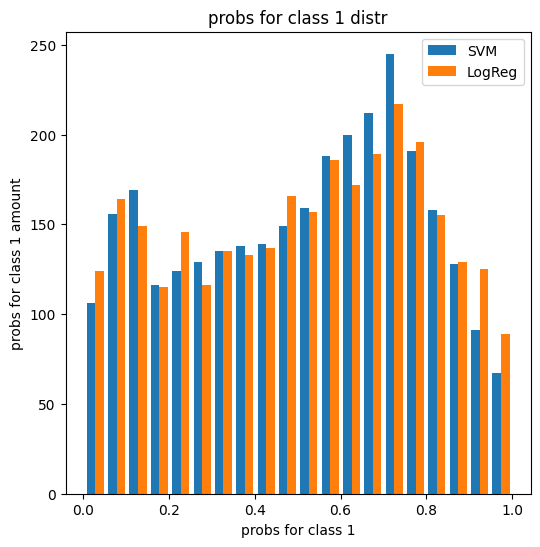

In [15]:
_, ax = plt.subplots(1, 1, figsize=(6, 6))

ax.hist([v_calibrate_sigmoid(y_pred_svc_proba), y_pred[:, 1]], bins=20, label=['SVM', 'LogReg'])

ax.legend()
ax.set_xlabel('probs for class 1')
ax.set_ylabel('probs for class 1 amount')
ax.set_title('probs for class 1 distr')

None

**В данном методе реализована калибровка Платта с максимизацией правдоподобия выборки с оптимизацией сразу по двум параметрам с использованием ALS, то есть фиксируем одну переменную, делаем шаг градиента по другой, и наоборот. В целом получилось неплохо**

## Часть 3. Логистическая регрессия.

__Задание 3.__ Обучение логистической регрессии на реальных данных и оценка качества классификации.

**(0.5 балл)**

__Подготовка данных.__

Загрузим данные с конкурса  [Kaggle Porto Seguro’s Safe Driver Prediction](https://www.kaggle.com/c/porto-seguro-safe-driver-prediction) (вам нужна только обучающая выборка). Задача состоит в определении водителей, которые в ближайший год воспользуются своей автомобильной страховкой (бинарная классификация). Но для нас важна будет не сама задача, а только её данные. При этом под нужды задания мы немного модифицируем датасет.

In [3]:
data = pd.read_csv('train.csv', index_col=0)
target = data.target.values
data = data.drop('target', axis=1)

Пересемплируем выборку так, чтобы положительных и отрицательных объектов в выборке было одинаковое число. Разделим на обучающую и тестовую выборки.


In [4]:
# some resampling
np.random.seed(910)
mask_plus = np.random.choice(np.where(target == 1)[0], 100000, replace=True)
mask_zero = np.random.choice(np.where(target == 0)[0], 100000, replace=True)

data = pd.concat((data.iloc[mask_plus], data.iloc[mask_zero]))
target = np.hstack((target[mask_plus], target[mask_zero]))

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.5)

Обучите логистическую регрессию с удобными для вас параметрами. Сделайте предсказание на тестовой части выборки.

In [7]:
logreg = LogisticRegression(C=2.0, solver='liblinear')
logreg.fit(X_train, y_train)

LogisticRegression(C=2.0, solver='liblinear')

In [8]:
y_pred = logreg.predict(X_test)
y_proba = logreg.predict_proba(X_test)[:, 1]

Постройку ROC-кривую и Precision-Recall-кривую, посчитайте ROC-AUC и PR-AUC. Какие наблюдения и выводы по ним можно сделать? (В свободной форме)

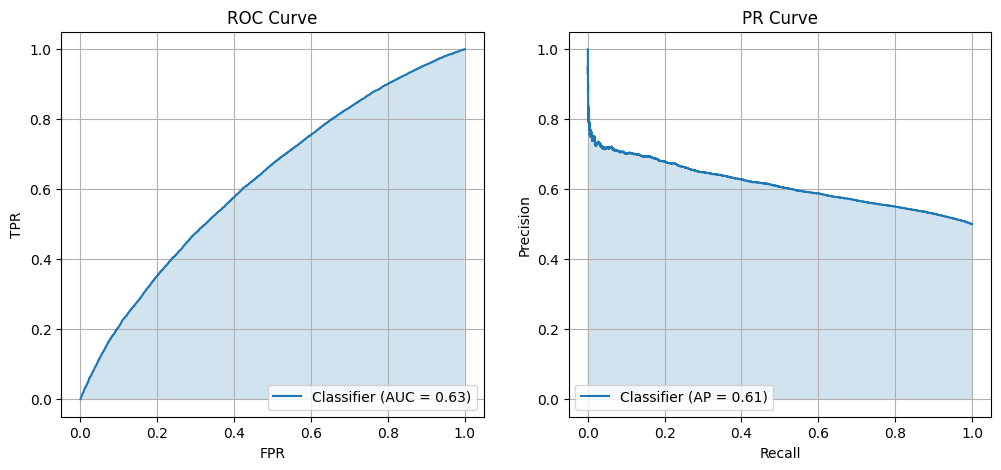

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

fpr, tpr, _ = roc_curve(y_test, y_proba)
RocCurveDisplay.from_predictions(y_test, y_proba, ax=ax[0])

precision, recall, _ = precision_recall_curve(y_test, y_proba)
PrecisionRecallDisplay.from_predictions(y_test, y_proba, ax=ax[1])

ax[0].grid(True)
ax[0].set_title("ROC Curve")
ax[0].set_ylabel('TPR')
ax[0].set_xlabel('FPR')
ax[0].fill_between(fpr, tpr, alpha=0.2)

ax[1].grid(True)
ax[1].set_title("PR Curve")
ax[1].set_ylabel('Precision')
ax[1].set_xlabel('Recall')
ax[1].fill_between(recall, precision, alpha=0.2)

None

**Качесто roc auc и ap весьма невысокое, что говорит о не самом лучшем качестве классификатора, причем глядя на график PR, видно, что уже при невысоком пороге бинаризации немало обьектов класса 0 относится к классу 0, что возможно говорит о нелинейной зависимости в данных. Также при recall=1.0, precision ~ 0.55, что говорит я дисбалансе в классах**

__Задание 4.__ Изучение влияния регуляризатора на процесс обучения

__(1 балл)__

Проверьте на практике, как влияет регуляризатор на процесс обучения (убывание функции потерь на обучающей и отложенной выборках). Чтобы считать функцию потерь на отложенной выборке после каждой итерации, можно воспользоваться параметром `warm_start` у `sklearn.linear_model.LogisticRegression` либо методом `partial_fit` `sklearn.linear_model.SGDClassifier` (параметр `loss` тогда должен быть равен `log`).

Замечание:
* Для каждого $\alpha$ своя функция на графике; функции можно отображать на одном полотне **обязательно с легендой;** если $\alpha$ слишком много и на одном полотне они выглядят грязно, то можно строить на нескольких, однако в этом случае рекомендуется приводить масштаб и деления (min, max значения) на оси $y$ к одним  и тем же значениям --- так визуально будет очень просто сравнить графики и сделать выводы :)
* $\alpha$ желательно перебирать по **логарифмической шкале** (примерно как в первом задании), однако можно использовать информацию о том, что при некоторых значениях $\alpha$ модель не обучается хорошо и не исследовать их. Тут обязательно перебрать хотя бы 3 разных (степени в лог. шкале) $\alpha$, больше -- приветствуется.

In [36]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss

param_grid = {'alpha': np.logspace(start=-3, stop=1, base=10, num=4)}
n_iter = 120
losses = dict()

for alpha in param_grid['alpha']:
    losses[alpha] = list()
    lin_model = SGDClassifier(alpha=alpha, loss='log_loss')
    for it in range(n_iter):

        lin_model.partial_fit(X_train, y_train, classes=[0, 1])
        losses[alpha].append(log_loss(y_test, lin_model.predict(X_test)))

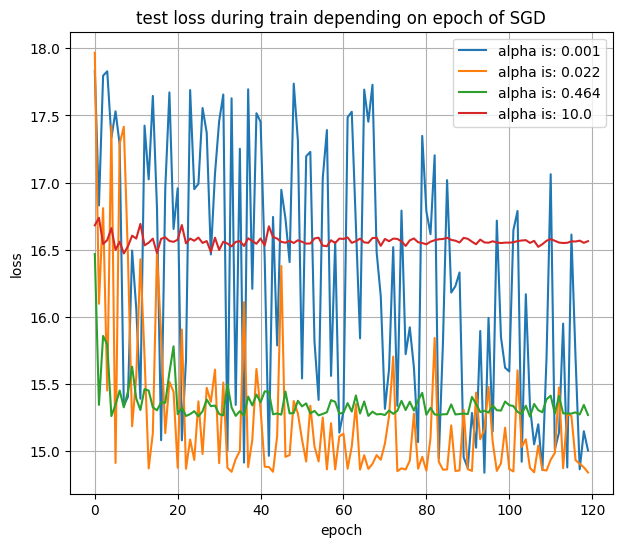

In [37]:
_, ax = plt.subplots(1, 1, figsize=(7, 6))

ax.set_title('test loss during train depending on epoch of SGD')
ax.set_xlabel('epoch')
ax.set_ylabel('loss')

for alpha in param_grid['alpha']:
    ax.plot(list(range(n_iter)), losses[alpha], label=f'alpha is: {np.round(alpha, 3)}')

ax.grid(True)
ax.legend()

None

In [34]:
param_grid = {'alpha': np.logspace(start=-3, stop=1, base=10, num=4)}
n_iter = 120
losses = dict()

for alpha in param_grid['alpha']:
    losses[alpha] = list()
    lin_model = SGDClassifier(alpha=alpha, loss='log_loss')
    for it in range(n_iter):

        lin_model.partial_fit(X_train, y_train, classes=[0, 1])
        losses[alpha].append(log_loss(y_train, lin_model.predict(X_train)))

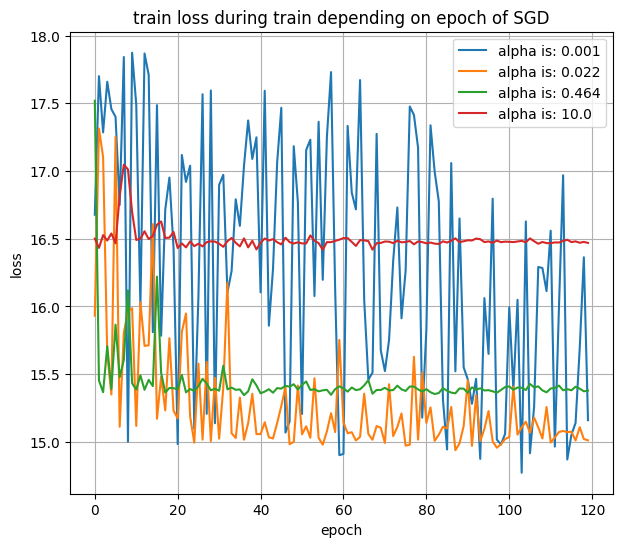

In [35]:
_, ax = plt.subplots(1, 1, figsize=(7, 6))

ax.set_title('train loss during train depending on epoch of SGD')
ax.set_xlabel('epoch')
ax.set_ylabel('loss')

for alpha in param_grid['alpha']:
    ax.plot(list(range(n_iter)), losses[alpha], label=f'alpha is: {np.round(alpha, 3)}')

ax.grid(True)
ax.legend()

None

## Часть 4. Работа с категориальными переменными

В этой части мы научимся обрабатывать категориальные переменные, так как закодировать их в виде чисел недостаточно (это задаёт некоторый порядок, которого на категориальных переменных может и не быть). Существует два основных способа обработки категориальных значений:
- One-hot-кодирование
- Счётчики (CTR, mean-target кодирование, ...) — каждый категориальный признак заменяется на среднее значение целевой переменной по всем объектам, имеющим одинаковое значение в этом признаке.

Начнём с one-hot-кодирования. Допустим наш категориальный признак $f_j(x)$ принимает значения из множества $C=\{c_1, \dots, c_m\}$. Заменим его на $m$ бинарных признаков $b_1(x), \dots, b_m(x)$, каждый из которых является индикатором одного из возможных категориальных значений:
$$
b_i(x) = [f_j(x) = c_i]
$$

В этой части работаем с датасетом из предыдущей части.

__Задание 5.__ Посчитайте качество (в этом задании будем работать c ROC-AUC) на исходных признаках при применении логистической регрессии.

__(0 баллов)__

In [50]:
import time

start = time.time()

logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)

stop = time.time()

print('Fitting time consumption:', stop - start)
print('ROC AUC score:', roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1]))

Fitting time consumption: 9.06274676322937
ROC AUC score: 0.6250611322008803


__Задание 6.__ Закодируйте все категориальные признаки с помощью one-hot-кодирования. Обучите логистическую регрессию и посмотрите, как изменилось качество модели (с тем, что было до кодирования). Измерьте время, потребовавшееся на обучение модели.

__(0.5 балла)__

In [51]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

import re

start = time.time()

cat_cols = [
    idx for idx, col in enumerate(X_train.columns) 
    if re.match(r"\b\w+cat\b", col)
]

categorical_transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), cat_cols)
    ],
    remainder='passthrough'
)

logreg_pipe = Pipeline([
    ('preprocess', categorical_transformer),
    ('logreg', LogisticRegression(solver='liblinear'))
])
logreg_pipe.fit(X_train, y_train)

stop = time.time()

print('Fitting time consumption:', stop - start)
print('ROC AUC score:', roc_auc_score(y_test, logreg_pipe.predict_proba(X_test)[:, 1]))

Fitting time consumption: 9.372716665267944
ROC AUC score: 0.6329303831141975


Как можно было заменить, one-hot-кодирование может сильно увеличивать количество признаков в датасете, что сказывается на памяти, особенно, если некоторый признак имеет большое количество значений. Эту проблему решает другой способ кодирование категориальных признаков — счётчики. Основная идея в том, что нам важны не сами категории, а значения целевой переменной, которые имеют объекты этой категории. Каждый категориальный признак мы заменим средним значением целевой переменной по всем объектам этой же категории:
$$
g_j(x, X) = \frac{\sum_{i=1}^{l} [f_j(x) = f_j(x_i)][y_i = +1]}{\sum_{i=1}^{l} [f_j(x) = f_j(x_i)]}
$$

Отметим, что такие признаки сами по себе являются классификаторами и, обучаясь на них, мы допускаем "утечку" целевой переменной в признаки. Это ведёт к переобучению, поэтому считать такие признаки необходимо таким образом, чтобы при вычислении для конкретного объекта его целевая метка не использовалась. Это можно делать следующими способами:
1. Вычислять значение счётчика по всем объектам расположенным выше в датасете (например, если у нас выборка отсортирована по времени).
2. Вычислять по фолдам, то есть делить выборку на некоторое количество частей и подсчитывать значение признаков по всем фолдам кроме текущего (как делается в кросс-валидации).
3. Внесение некоторого шума в посчитанные признаки. 

__(Бонусная часть)__ Закодируйте категориальные переменные с помощью счётчиков (ровно так, как описано выше без каких-либо хитростей). Реализуйте корректное вычисление счётчиков самым простым способом — добавление шума к значениям (необходимо соблюсти баланс между избавление от переобучения и полезностью признаков). Снова обучите логистическую регрессию, оцените качество. Сделайте выводы. Не забудьте замерить время.

__(+0.5 балл)__

In [70]:
# Кодирование по среднему значению таргета для одной и той же категории

X_train_copy = X_train.copy()
X_test_copy = X_test.copy()

pd.options.mode.chained_assignment = 'warn'

cat_cols = [
    col for col in X_train.columns 
    if re.match(r"\b\w+cat\b", col)
]

for cat_col_name in cat_cols:
    cat_col_train = X_train_copy[cat_col_name]
    cat_col_test = X_test_copy[cat_col_name]

    for cat_label in pd.unique(cat_col_train):
        mask = cat_col_train == cat_label
        mean_target_train = np.mean(y_train[mask])
        X_train_copy.loc[mask, cat_col_name] = mean_target_train

        mask = cat_col_test == cat_label
        X_test_copy.loc[mask, cat_col_name] = mean_target_train

In [71]:
# без добавления шума
start = time.time()

logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train_copy, y_train)

stop = time.time()

print('Fitting time consumption:', stop - start)
print('ROC AUC score:', roc_auc_score(y_test, logreg.predict_proba(X_test_copy)[:, 1]))

Fitting time consumption: 13.513400077819824
ROC AUC score: 0.6285435246510268


In [79]:
for cat_col_name in cat_cols:
    X_train_copy[cat_col_name] += np.random.normal(loc=0, scale=0.1, size=len(X_train_copy[cat_col_name]))

In [80]:
# с добавлением шума
start = time.time()

logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train_copy, y_train)

stop = time.time()

print('Fitting time consumption:', stop - start)
print('ROC AUC score:', roc_auc_score(y_test, logreg.predict_proba(X_test_copy)[:, 1]))

Fitting time consumption: 10.675246000289917
ROC AUC score: 0.6248895637984097


**В целом, как можно заметить качество не улучшилось практически совсем, возможно, из-за переобучения**

__(Бонусная часть)__ Посчитайте корректные счётчики, основываясь на объектах расположеных выше в датасете (не забудьте добавить и шум). 

__(+0.5 балла)__

In [89]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=6)

X_train_copy = X_train.copy()
X_test_copy = X_test.copy()

pd.options.mode.chained_assignment = 'warn'

cat_cols = [
    col for col in X_train.columns 
    if re.match(r"\b\w+cat\b", col)
]

for cat_col_name in cat_cols:
    cat_col_train = X_train[cat_col_name]
    cat_col_test = X_test[cat_col_name]

    test_encoding = dict()

    for (train_index, test_index) in kf.split(X_train):
        
        train_part = X_train.iloc[train_index][cat_col_name]
        test_part = X_train.iloc[test_index][cat_col_name]
        y_train_part = y_train[train_index]

        for cat_label in pd.unique(cat_col_train):
            mask = train_part == cat_label
            mean_target_train = np.mean(y_train_part[mask])

            if test_encoding.get(cat_label, None) is None:
                test_encoding[cat_label] = list()
            test_encoding[cat_label].append(mean_target_train)
            
            X_train_copy.iloc[test_index].loc[test_part == cat_label, cat_col_name] = mean_target_train
        
        test_encoding_update = dict()
        for key, value in test_encoding.items():
            test_encoding_update[key] = np.mean(value)
        
        for cat_label in pd.unique(cat_col_train):
            mask = cat_col_test == cat_label
            X_test_copy.loc[mask, cat_col_name] = test_encoding_update[cat_label]

In [90]:
# без добавления шума
start = time.time()

logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train_copy, y_train)

stop = time.time()

print('Fitting time consumption:', stop - start)
print('ROC AUC score:', roc_auc_score(y_test, logreg.predict_proba(X_test_copy)[:, 1]))

Fitting time consumption: 10.013787031173706
ROC AUC score: 0.6100422519846085


In [91]:
for cat_col_name in cat_cols:
    X_train_copy[cat_col_name] += np.random.normal(loc=0, scale=0.1, size=len(X_train_copy[cat_col_name]))

In [92]:
# с добавлением шума
start = time.time()

logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train_copy, y_train)

stop = time.time()

print('Fitting time consumption:', stop - start)
print('ROC AUC score:', roc_auc_score(y_test, logreg.predict_proba(X_test_copy)[:, 1]))

Fitting time consumption: 6.978517770767212
ROC AUC score: 0.610209177987012


**Кодирование по фолдам тоже не дало особого эффекта, наоборот ухудшило результат, что с шумом, что без него**

А теперь ответьте на следующий вопрос: что будет, если некоторая категория встречается в выборке всего несколько раз? По этой причине производится сглаживание счётчиков. Например, на практике хорошие результаты показывает использование сглаживания средним по всей выборке:
$$
g_j(x, X) = \frac{\sum_{i=1}^{\ell} [f_j(x) = f_j(x_i)][y_i = +1] + C \times global\_mean}{\sum_{i=1}^{\ell} [f_j(x) = f_j(x_i)] + C}
$$
где $global\_mean$ — среднее значение целевой переменной по всей выборке, $C$ — параметр, определяющий степень сглаживания (например, можно использовать 10 или подобрать для каждого признака свой). Основная идея в том, что мы "разбавляем" среднее значение по некоторой категории глобальным средним значении. И тем меньше, чем большее количество объектов этой категории встречается в выборке. 

Однако для сглаживания вместо среднего значения целевой переменной можно использовать любое другое значение от 0 до 1 (этот параметр иногда называют $prior$). Можно сделать несколько признаков с разными значениями параметра. На практике в задачах бинарной классификации полезными бывают даже отрицательные значения!

__Задание 7.__ Реализуйте счетчики со сглаживанием, как описано выше. Обучите логистическую регрессию, оцените качество.

__(0.5 балл)__

In [96]:
def transform_categorical(X_train, X_test, y_train, C=10, use_global_mean=True, given_global_mean=None):
    X_train_copy = X_train.copy()
    X_test_copy = X_test.copy()

    pd.options.mode.chained_assignment = 'warn'

    if use_global_mean:
        global_mean = np.mean(y_train)
    else:
        global_mean = given_global_mean

    cat_cols = [
        col for col in X_train.columns 
        if re.match(r"\b\w+cat\b", col)
    ]

    for cat_col_name in cat_cols:
        cat_col_train = X_train_copy[cat_col_name]
        cat_col_test = X_test_copy[cat_col_name]

        for cat_label in pd.unique(cat_col_train):
            mask = cat_col_train == cat_label
            mean_target_train = (np.sum(y_train[mask]) + C * global_mean) / (len(y_train[mask]) + C)
            X_train_copy.loc[mask, cat_col_name] = mean_target_train

            mask = cat_col_test == cat_label
            X_test_copy.loc[mask, cat_col_name] = mean_target_train
    
    return X_train_copy, X_test_copy

In [97]:
X_train_copy, X_test_copy = transform_categorical(X_train, X_test, y_train)

start = time.time()

logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train_copy, y_train)

stop = time.time()

print('Fitting time consumption:', stop - start)
print('ROC AUC score:', roc_auc_score(y_test, logreg.predict_proba(X_test_copy)[:, 1]))

Fitting time consumption: 14.483410596847534
ROC AUC score: 0.628571950651436


In [99]:
X_train_copy, X_test_copy = transform_categorical(
    X_train, X_test, y_train,
    use_global_mean=False, given_global_mean=-0.05
)

start = time.time()

logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train_copy, y_train)

stop = time.time()

print('Fitting time consumption:', stop - start)
print('ROC AUC score:', roc_auc_score(y_test, logreg.predict_proba(X_test_copy)[:, 1]))

Fitting time consumption: 14.52136754989624
ROC AUC score: 0.6286483546525363


__Замечание.__ Усложнение методов вычисления счётчиков не делают результаты модели гарантированно лучше. Особенно с учётом того, что логистическая регрессия не такая сложная модель, чтобы переобучаться. Поэтому вы необязательно должны были получать на каждом шаге всё лучшие и лучшие результаты (но необходимые результаты у вас должны были получиться).

Как вы должны были заметить, счётчики являются хорошей альтернативой one-hot-кодированию. Напишите, какие плюсы и минусы использования счётчиков по сравнению с one-hot-кодированием, вы заметили.

**Основной плюс счетчиков состоит в том, что они не увеличивают в значительной степени размерность нашего признакового пространства, наоборот, они сохраняют исходную размерность, что создает меньше возможностей для переобучения модели, так как не создается новых возможных избыточных призаков. С другой стороны, счетчики в любом случае заглядывают в метки наших данных, что очень даже легко в случае более сложных моделей может вести к переобучению**

## Отбор признаков

Важной частью процесса построения модели является отбор признаков. На практике многие признаки оказывают малое влияние на модель (при этом их расчёт занимает время) или даже негативно сказываются на качестве модели. Попробуем несколько подходов отбора признаков, оценим, как они влияют на качество модели и сколько времени занимают.

Обратимся к тому же датасету про обращение клиентов по страховым случаям. Обойдёмся без сэмплирования объектов.

In [4]:
data = pd.read_csv('train.csv', index_col=0)
target = data.target.values
data = data.drop('target', axis=1)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=124)

Как вы помните, в данных много категориальных признаков. Давайте закодируем их с помощью one-hot кодирования. Исходные колонки с категориальными признаками можно удалить. Сколько признаков мы получили?

In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

cat_cols = [
    idx for idx, col in enumerate(X_train.columns) 
    if re.match(r"\b\w+cat\b", col)
]

categorical_transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(sparse_output=False), cat_cols)
    ],
    remainder='passthrough'
)

X_train_transformed = categorical_transformer.fit_transform(X_train)
X_test_transformed = categorical_transformer.fit_transform(X_test)

print('Features amount before:', X_train.shape[1])
print('Features amount after:', X_train_transformed.shape[1])

Features amount before: 57
Features amount after: 227


В качестве основной модели будем использовать логистическую регрессию, а целевой метрики — ROC-AUC. Обучите модель и посчитайте качество на тестовой выборке. Давайте запомним полученное значение.

In [104]:
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train_transformed, y_train)

print('ROC AUC score:', roc_auc_score(y_test, logreg.predict_proba(X_test_transformed)[:, 1]))

ROC AUC score: 0.638079658559086


### Встроенные методы

Допустим, мы хотим оставить только 200 лучших признаков. Попробуем сделать это несколькими способами.

Начнём с отборам признаков с помощью линейной модели. Как известно, веса линейной модели означают вклад каждого признака в предсказание модели, а значит, модуль этого вклада можно интерпретировать как важность признаков. Такой метод отбора называются встроенным или embedded methods, так как он заложен в особенности модели.

__Задание 8.__ Оставьте 200 признаков с наибольшим модулем соответсвующего параметра линейной модели. Обучите модели заново и оцените её качество. Замерьте скорость такого отбора признаков (время обучения нашего метода отбора).

Изменилось ли качество? Как?

__(0.5 балла)__

In [131]:
lin_model = Ridge(alpha=0.5)
lin_model.fit(X_train_transformed, y_train)

idx_features = np.array(list(range(X_train_transformed.shape[1])))
idx_feature_importance = idx_features[np.argsort(lin_model.coef_)][::-1][:200]

X_train_top = X_train_transformed[:, idx_feature_importance]
X_test_top = X_test_transformed[:, idx_feature_importance]

logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train_top, y_train)

print('ROC AUC score:', roc_auc_score(y_test, logreg.predict_proba(X_test_top)[:, 1]))

ROC AUC score: 0.6375509522368272


А теперь давайте подумаем, что мы не учли. Мы предположили, что признаки вносят вклад равномерно, но не учли их масштаба. Если мы умножим один из признаков в 100 раз, то без учёта регуляризации его вес уменьшится в эти же 100 раз. А мы на основе этого отбираем признаки! Давайте сначала отнормируем признаки одним из способов, а только потом будем удалять признаки. 

Кстати, в таком случае надо пересчитать качество на всех признаках (сделайте это ниже). Если вы сделали нормирование признаков в самом начале, то попробуйте отобрать признаки на неотмасштабированных данных.

Что получилось?

In [27]:
from sklearn.preprocessing import StandardScaler

start = time.time()

scaler = StandardScaler()
ridge = Ridge(alpha=0.5)

X_train_norm = scaler.fit_transform(X_train_transformed)
X_test_norm = scaler.transform(X_test_transformed)

ridge.fit(X_train_norm, y_train)

idx_features = np.array(list(range(X_train_transformed.shape[1])))
idx_feature_importance = idx_features[np.argsort(ridge.coef_)][::-1][:200]

X_train_top = X_train_norm[:, idx_feature_importance]
X_test_top = X_test_norm[:, idx_feature_importance]

logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train_top, y_train)

stop = time.time()

print('Fitting time consumption:', stop - start)
print(
    'ROC AUC score:', 
    roc_auc_score(
        y_test, 
        logreg.predict_proba(
            X_test_top
        )[:, 1]
    )
)

Fitting time consumption: 23.905028581619263
ROC AUC score: 0.6348084239791592


### Методы фильтрации

Давайте отбирать признаки умнее, а именно через подсчёт некоторой функции для каждого признака. На основании значений этой функции будем оставлять наиболее важные признаки. Методы этого семейства называют фильтрующими или  filter methods. 

В качестве такой функции будем считать t-статистику:

$$t(x) = \frac{|\mu_+ - \mu_-|}{\sqrt{\frac{n_+ \sigma^2_+ + n_- \sigma^2_-}{n_+ + n_-}}},$$

где $\mu_{+/-}$, $\sigma_{+/-}$, $n_{+/-}$ соответственно это --- среднее; среднеквадратичное отклонение; количество объектов каждого из классов.

__Задание 9.__ Оставьте 200 признаков с наибольшим значением и замерьте качество. Не забудьте замерить скорость отбора признаков (время обучения нашего метода отбора) в этом случаев.

__(0.5 балла)__

In [150]:
feature_scores = list()

start = time.time()

for idx in range(X_train_transformed.shape[1]):
    feature_col = X_train_transformed[:, idx]
    
    pos_mask = y_train == 1
    neg_mask = y_train == 0

    pos_feature = feature_col[pos_mask]
    neg_feature = feature_col[neg_mask]

    pos_mean, neg_mean = np.mean(pos_feature), np.mean(neg_feature)
    pos_std, neg_std = np.std(pos_feature), np.std(neg_feature)
    pos_size, neg_size = len(pos_feature), len(neg_feature)

    numerator = np.abs(pos_mean - neg_mean)
    denominator = np.sqrt((pos_size*(pos_std**2) + neg_size*(neg_std**2))/(neg_size + pos_size))
    
    feature_scores.append((idx, numerator/denominator))

n_top = 200
feature_scores = sorted(feature_scores, key=lambda x: x[1], reverse=True)

best_cols = [feature_scores[i][0] for i in range(n_top)]

X_train_top = X_train_transformed[:, best_cols]
X_test_top = X_test_transformed[:, best_cols]

logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train_top, y_train)

stop = time.time()

print('Fitting time consumption:', stop - start)
print('ROC AUC score:', roc_auc_score(y_test, logreg.predict_proba(X_test_top)[:, 1]))

Fitting time consumption: 11.570281505584717
ROC AUC score: 0.638592621925231


### Методы-обёртки

__Задание 10.__ 

__(1 балл)__

Заключительный из рассматриваемых нами методов работает следующим образом: мы исключаем по очереди один из признаков и смотрим, как это влияет на качество. Удаляем признаки таким жадным способом, пока не достигнем некоторого критерия (количество признаков или ухудшением качества).

Заметим, что нельзя оценивать качество по тестовой выборке, иначе мы можем переобучиться, как, например, при настройке гиперпараметров. Разделите выборку на 2 части, на одной из них обучайте модель без одного из признаков,  на второй части оценивайте качество. Исходную тестовую выборку стоит использовать только на финальной оценке качества.

Сделайте одну итерацию и прикиньте, сколько времени займёт такой отбор признаков. Кажется, что чересчур. Давайте возьмём маленький сэмпл данных (например, в 10 тысяч объектов), что сильно уменьшит время итерации. Теперь это долго, но уже приемлимо. 

Если это всё ещё долго для вашего комьютера, можете попробовать брать не по одному признаку, а сразу по пять (и удалять сразу тоже по 5). Для этого перед каждой итерацией удаления делите заново все признаки на группы по 5 штук.

Снова оставьте только 200 признаков и оцените качество на тестовой выборке. Сколько времени занял такой отбор признаков?

In [26]:
start = time.time()

X_train_1, X_train_2, y_train_1, y_train_2 = train_test_split(
    X_train_transformed, y_train, train_size=0.8, 
    random_state=100, stratify=y_train
)

train_part_1, useless_1, y_train_part_1, useless_2 = train_test_split(
    X_train_1, y_train_1, train_size=0.05, 
    random_state=100, stratify=y_train_1
)

features_threshold = 200
max_iter = 15
num_features = X_train_transformed.shape[1]
col_idx = list(range(num_features))

# удаляем жадну по 1 признаку, начиная с 1, пока не будет меньше порога
for i in range(max_iter):

    logreg = LogisticRegression(solver='liblinear')
    logreg.fit(train_part_1[:, col_idx], y_train_part_1)

    iter_score = roc_auc_score(y_train_2, logreg.predict_proba(X_train_2[:, col_idx])[:, 1])

    for idx in range(num_features):

        if not idx in col_idx:
            continue

        col_idx.remove(idx)

        logreg = LogisticRegression(solver='liblinear')
        logreg.fit(train_part_1[:, col_idx], y_train_part_1)

        roc_auc = roc_auc_score(y_train_2, logreg.predict_proba(X_train_2[:, col_idx])[:, 1])

        if roc_auc < iter_score:
            col_idx.append(idx)

        if len(col_idx) <= features_threshold:
            break
    
    if len(col_idx) <= features_threshold:
        break

stop = time.time()

print('Fitting time consumption:', stop - start)

Fitting time consumption: 32.43821954727173


In [25]:
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train_transformed[:, col_idx], y_train)

print('ROC AUC score:', roc_auc_score(y_test, logreg.predict_proba(X_test_transformed[:, col_idx])[:, 1]))

ROC AUC score: 0.636248006768067


Давайте подведём итоги по отбору признаков. Назовите преимущества и недостатки каждого из методов. Какой метод привёл к наилучшему качеству?

**В целом все методы показали примерную исходную точность, когда мы не применяли никакие способы фильтрации. Методы-обертки работают дольше всего, так как даже на малом количестве данных уже выходит около 34 секунду, t-Стьюдента работает около 24 секунд, встроенный метод линеных моделей - около 11 секунду. По качеству везде roc auc около 0.638, возможно, надо взять более сложную модель, которая может искать более изощренные закономерности, тогда прирост качества будет более заметен**

## Настройка порога для бинаризации вероятностей

В этой части мы будем проделывать стандартные операции для подготовки модели к её реальному использованию — подбора порога для бинаризации вероятностей с учётом потребностей бизнеса или продукта. Хороший алгоритм с точки зрения ROC-AUC это, конечно, хорошо, но ведь в реальности нам надо принимать решение бинарно, например, выдавать ли кредит человеку. 

Воспользуемся той же самой задачей, что и в предыдущем разделе — определение обращение клиента в страховую в ближайшее время. Положительные объекты в нашей выборки как раз обратившиеся в страховую клиенты. 

Не вдаваясь в подробности бизнеса страховых, можно понять, что обращение клиента по страховому случаю для нас как страховой невыгодно, ведь мы теряем на этом деньги. Клиенты, которые не обращаются в страховую и ездят аккуратно, приносят нам деньги.

Пусть на каждом клиенте, который обратился в нашу страховую, мы теряем 100000, а на клиенте, который не обратился в страховую, мы зарабатываем 5000. 

Будем строить алгоритм, который прогнозирует обращение по страховому случаю, чтобы некоторым потенциальным клиентам отказывать в обслуживании, если мы уверены, что на них мы потеряем деньги.

In [3]:
data = pd.read_csv('train.csv', index_col=0)
target = data.target.values
data = data.drop('target', axis=1)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=124)

В этот раз мы не будем сэмплировать данные и будем использовать их "как есть".

Посчитайте долю положительных примеров в выборке? Скажите, почему она такая?

In [7]:
print('class 0:', np.bincount(target)[0], 'class 1:', np.bincount(target)[1])

class 0: 573518 class 1: 21694


**Так как многие клиенты, стараются бережно относится к своими вещам, например, к машине, и не хотят часто мучаться со страховыми компаниями, поэтому класса 0 в выборке гораздо больше. С другой стороны, если бы клиенты часто обращались в страховые компании, то есть преобладал класс 1, то тогда компании разорились бы)**

Как вы помните, в данных много категориальных признаков. Давайте закодируем их с помощью one-hot кодирования. Исходные колонки с категориальными признаками можно удалить.

In [14]:
cat_cols = [
    col for col in X_train.columns 
    if re.match(r"\b\w+cat\b", col)
]

X_train_transformed = pd.get_dummies(X_train, columns=cat_cols, drop_first=True, sparse=False)
X_test_transformed = pd.get_dummies(X_test, columns=cat_cols, drop_first=True, sparse=False)

В качестве нашей основной модели будем использовать логистическую регрессию, которая возвращает вероятность положительного класса. Обучите модель, сделайте предсказания на тестовой выборке.

In [15]:
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train_transformed, y_train)

y_probs = logreg.predict_proba(X_test_transformed)

Посчитайте ROC-AUC. Что вы можете про него сказать? Как вы считаете, почему получилось так?

In [17]:
roc_auc_score(y_test, y_probs[:, 1])

0.6379381514931595

Постройте precision-recall кривую на тестовой выборке. Что вы можете по ней сказать?

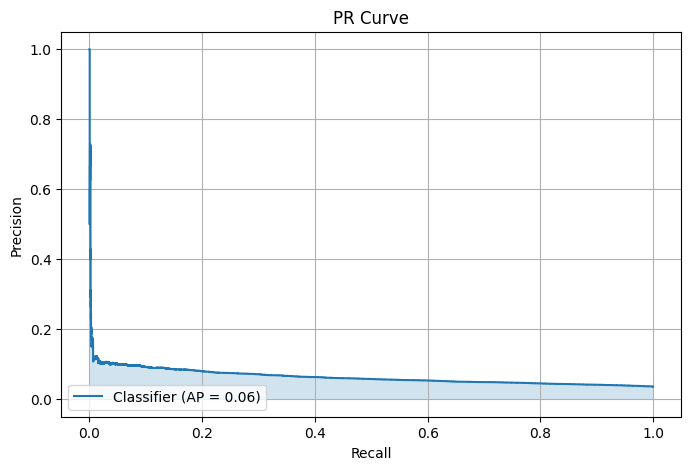

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

precision, recall, threshold = precision_recall_curve(y_test, y_probs[:, 1])
PrecisionRecallDisplay.from_predictions(y_test, y_probs[:, 1], ax=ax)

ax.grid(True)
ax.set_title("PR Curve")
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
ax.fill_between(recall, precision, alpha=0.2)

None

**Видно, что уже при высоком пороге бинаризации, Precision падает заметно, то есть алгоритм плохо классифицирует тех, кто обратиться к страховой компании, то есть высокий FP, то есть выдаем страхову не тем людям**

У нас есть алгоритм, который определяет вероятность обращения клиента по страховому случаю, но мы хотим использовать этот алгоритм, чтобы отказывать клиентам в обслуживании в страховой. Для этого нам нужны бинарные предсказания алгоритма. Давайте искать этот порог для получения бинарных предсказаний.

__Задание 11.__

__(0.5 балла)__

Предположим, что нам надо подобрать порог такой, чтобы среди наших положителных предсказаний 95\% действительно обратились бы по страховому случаю. Подберите соответствующий порог, оцените на нём precision, recall. Скажите, какой части потенциальных клиентов мы откажем?

In [30]:
best_precision = 0.95
best_prec, best_rec, best_thres = 0, 0, 0

precision, recall, threshold = precision_recall_curve(y_test, y_probs[:, 1])

for prec, rec, thres in zip(precision, recall, threshold):
    if prec > best_precision:
        best_prec, best_rec, best_thres = prec, rec, thres
        break
    elif prec > best_prec:
        best_prec, best_rec, best_thres = prec, rec, thres

print('Precision:', best_prec)
print('Recall:', best_rec)
print('Threshold:', best_thres)

Precision: 1.0
Recall: 0.0004628558204119417
Threshold: 0.47394128945266134


Иногда сложно решить, какие значения precision и recall нужны в нашей задаче. Однако иногда можно оценить экономический эффект от нашего алгоритма. Мы знаем, во сколько нам обходится клиент, который обратился в страховую, и сколько нам приносит клиент, который не обратился. 

При фиксированном пороге мы знаем, кому мы бы отказали в обслуживании. Среди них есть те, кто обратился бы в страховую и нам пришлось бы потратить деньги, и те, кто не обратился бы, то есть принёс бы нам деньги. Мы можем посчитать разницу между нашими доходами и расходами от этой группы людей и надеяться, что она будет положительной. 

__Задание 12.__ Найдите такой порог, при котором наш баланс (разница между доходами и расходами на группе клиентов, которым мы отказали) неотрицательный. Доход, очевидно, считается только по тем людям, которым мы предполагаем что не отказали.

__(1 балл)__

In [58]:
max_balance = 0
threshold = 0
income = 5000
outcome = 100000

balance_results = list()
clients_rejected = list()

for thres in np.linspace(0, y_probs[:, 1].max(), 50):
    y_pred = y_probs[:, 1].copy()
    y_pred[y_probs[:, 1] < thres], y_pred[y_probs[:, 1] >= thres] = 0, 1
    
    balance_income = income * (((y_pred == 0) & (y_test == 0)).sum())
    balance_outcome = outcome * (((y_pred == 1) & (y_test == 0)).sum())
    
    balance = balance_income - balance_outcome

    if balance > max_balance:
        max_balance, threshold = balance, thres

    balance_results.append(balance)
    clients_rejected.append(int(len(y_pred) - y_pred.sum()))

print('Threshold for positive balance: ', threshold)

Threshold for positive balance:  0.4619974899019291


А на каком значение порога это разнциа максимальна? Скольким клиентам мы отказали в обслуживании?

In [60]:
print('Max balance:', balance_results[np.argmax(balance_results)])
print('Rejected clients:', clients_rejected[np.argmax(balance_results)])

Max balance: 573610000
Rejected clients: 119041


## Часть 5 (бонус). Vowpal Wabbit

В этой части мы научимся использовать библиотеку [vowpal wabbit](https://github.com/JohnLangford/vowpal_wabbit). У неё есть несколько особенностей:
- можно обучать только линейные модели, но за счёт большого количества опций и возможностей по усложнению, можно построить и довольно сложные вещи
- можно обучаться на выборках, которые не помещаются в оперативную память
- можно обрабатывать большое количество признаков (например, мешки слов текстов) и "на ходу" строить на них комбинации (не переделывать датасет)
- другие особенности, как например, активное обучение и возможность распараллеленного обучения.

Основные особенности при использовании следующие:
- Свой формат данных: "label |A feature1:value1 |B feature2:value2", позволяющий, во-первых, указывать не все признаки (не нужно хранить много нулей в разреженных данных), а во-вторых, группировать и иметь возможность отключать или взаимодействовать ("отключать", добавлять квадратичные признаки и т.д.) сразу со всей группой признаков. По этой причине вам понадобится реализовать конвертер датасета и загрузку своих предсказаний, чтобы посчитать качество предсказаний.
- Запуск обучения из командной строки (однако можно запускать эти же команды из ноутбука).

В этот раз мы будем использовать данные с конкурса [Kaggle Avazu Click-Through Rate Prediction](https://www.kaggle.com/c/avazu-ctr-prediction) по предсказанию кликов (бинарная классификация). В обучающей выборке 40kk строк, так что у вас не должно быть желания загружать их в оперативную память. Предлагается взять первые 30kk строк в качестве обучающей выборке и оставшуюся часть для тестирования.

<font color="red"> !!ВНИМАНИЕ!! ХАЛЯВНЫЕ БАЛЛЫ!! ЗАДАНИЕ НА 0.5 БАЛЛА НЕСЛОЖНОЕ И ОЧЕНЬ ПОЛЕЗНОЕ!!</font>

__Задание 13.__ Работа с vowpal wabbit. 

- Скачайте данные, разделите их на обучающую и тестовую выборки.
- Подготовьте функции для конвертирования датасета в формат vowpal wabbit и для загрузки предсказаний в ноутбук для подсчёта функционала.
- Сделайте простейшее решение на vowpal wabbit. Оцените качество.
- Изучите возможности и параметры vowpal wabbit. Поэксперементируйте. 
- Расскажите, что интересного вы узнали (какие-нибудь особенности, режимы работы, фишки, параметры).
- Удалось ли вам улучшить качество базовой модели? Насколько? Что ещё можно было бы попробовать?

В этом задании предусмотрены баллы по двум критериям:
- Мы видим, что вы **"поигрались" с vw**, а именно: запуск vw, обучение модели и предсказание ответов на нашем датасете (2-3 попытки обучения с разными параметрами, если не достигли 0.738), изменение значения/включения/выключения 2-3 параметров обучения с описанием того, что они делают. Несколько занимательных фактов и возможностей vowpal-wabbit __(0.5 балла)__.
- Достижение ROC-AUC на отложенной выборки более 0.738 __(1 балл)__

In [142]:
import vowpalwabbit as vw

def text_preparing(name, zero_class_amount, first_class_amount, train_volume=0.9):

    train_data = list()
    test_data = list()
    y_test = list()
    mode_zero, mode_first = 'train', 'train'
    categories, features = None, None
    zero_class_num, first_class_num = 0, 0

    with open(name, 'r') as fin:
        for idx, line in enumerate(fin):
            if idx == 0:
                categories = line.split(',')[1:]
                continue
            else:
                features = line.split(',')[1:]
            
            train_example = ''
            target_name = 'click'
            label = None
            
            for idx, (cat, val) in enumerate(zip(categories, features)):
                if cat == target_name:
                    label = int(val)

                    if label == 0:
                        if zero_class_num > zero_class_amount:
                            mode_zero = 'stop'
                            break
                        if zero_class_num > int(train_volume * zero_class_amount):
                            mode_zero = 'test'
                        zero_class_num += 1
                        train_example += f'-1'
                    else:
                        if first_class_num > first_class_amount:
                            mode_first = 'stop'
                            break
                        if first_class_num > int(train_volume * first_class_amount):
                            mode_first = 'test'
                        first_class_num += 1
                        train_example += f'1'

                else:
                    train_example += f' |f{idx} {val}'

            if label == 0:
                if mode_zero == 'train':
                    train_data.append(train_example)
                elif mode_zero == 'test':
                    test_data.append(train_example[2:])
                    y_test.append(0)
            else:
                if mode_first == 'train':
                    train_data.append(train_example)
                elif mode_first == 'test':
                    test_data.append(train_example[1:])
                    y_test.append(1)
    
    return train_data, test_data, y_test


train_data, test_data, y_test = text_preparing(
    name='train',
    zero_class_amount=50000,
    first_class_amount=50000,
    train_volume=0.95
)

In [143]:
import os

with open(os.path.join('train.txt'), 'w') as vw_train_data:
    for line in train_data:
        vw_train_data.write(line)

with open(os.path.join('test.txt'), 'w') as vw_test_data:
    for line in test_data:
        vw_test_data.write(line)

In [ ]:
!vw -d train.vw --oaa=2 --loss_function=logistic --probabilities -f model.vw
!vw -d train.txt -f model.vw --binary

!vw -t -i model.vw -d test.txt -p predictions.txt

In [ ]:
y_probs = list()

with open('probs.txt', 'r') as probs:
    for prob in probs:
        y_probs.append(double(prob.split(' ')[1].split(':')[1]))
  
roc_auc_score(y_test, y_probs)